In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [31]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [33]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [34]:

print(df.isnull().any().sum(), '/', len(df.columns)) 
print(df.isnull().any(axis=1).sum(), '/', len(df))

0 / 13
0 / 545


In [35]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


C:\Users\admin\AppData\Local\Temp\ipykernel_27036\3200986948.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


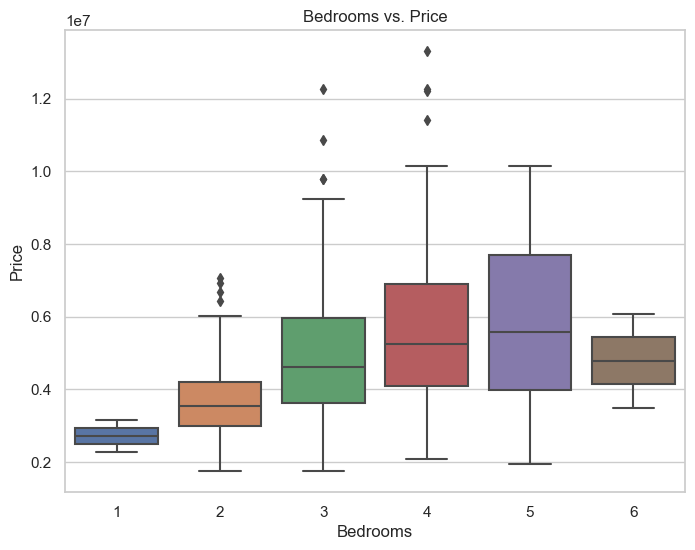

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="bedrooms", y="price", data=df)
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Bedrooms vs. Price")
plt.style.use('seaborn-darkgrid')
plt.show()

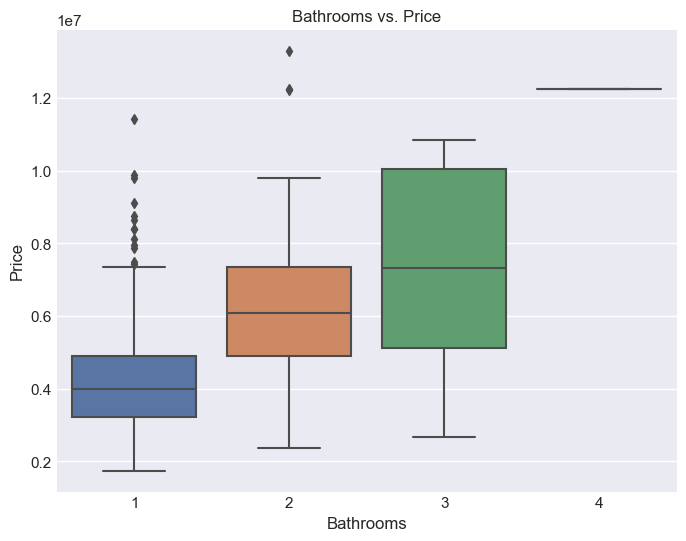

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="bathrooms", y="price", data=df)
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.title("Bathrooms vs. Price")
plt.show()

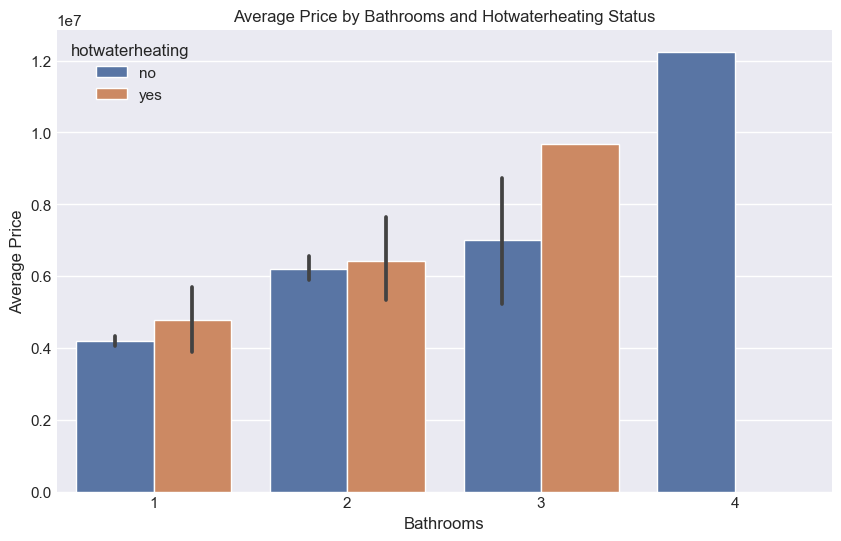

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x="bathrooms", y="price", hue="hotwaterheating", data=df)
plt.xlabel("Bathrooms")
plt.ylabel("Average Price")
plt.title("Average Price by Bathrooms and Hotwaterheating Status")
plt.show()

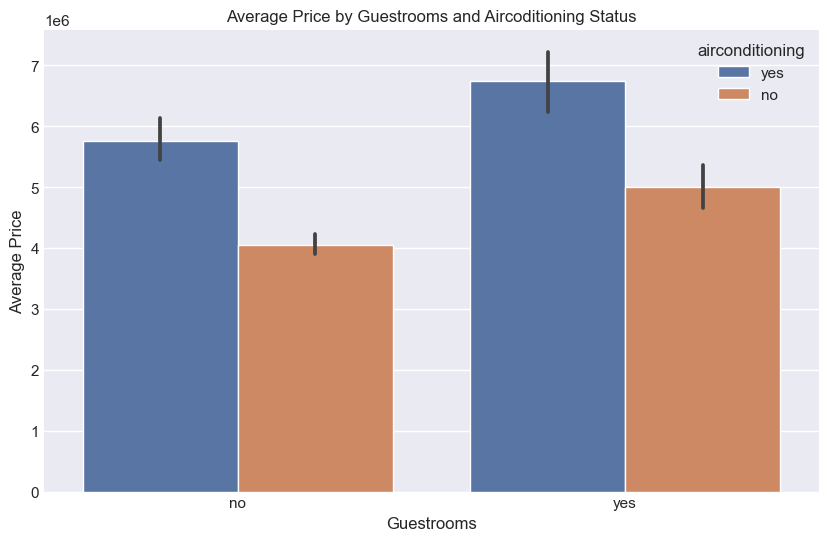

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x="guestroom", y="price", hue="airconditioning", data=df)
plt.xlabel("Guestrooms")
plt.ylabel("Average Price")
plt.title("Average Price by Guestrooms and Aircoditioning Status")
plt.show()

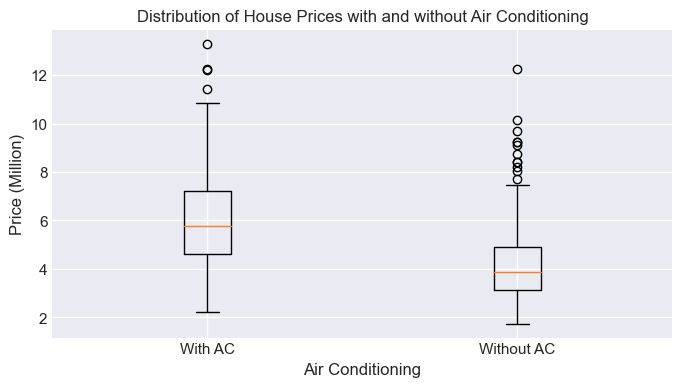

In [40]:
prices_with_ac = df[df['airconditioning'] == 'yes']['price'] / 1e6  
prices_without_ac = df[df['airconditioning'] == 'no']['price'] / 1e6  

plt.figure(figsize=(8, 4))
plt.boxplot([prices_with_ac, prices_without_ac], labels=['With AC', 'Without AC'])
plt.title('Distribution of House Prices with and without Air Conditioning')
plt.ylabel('Price (Million)')
plt.xlabel('Air Conditioning')
plt.grid(True)
plt.show()

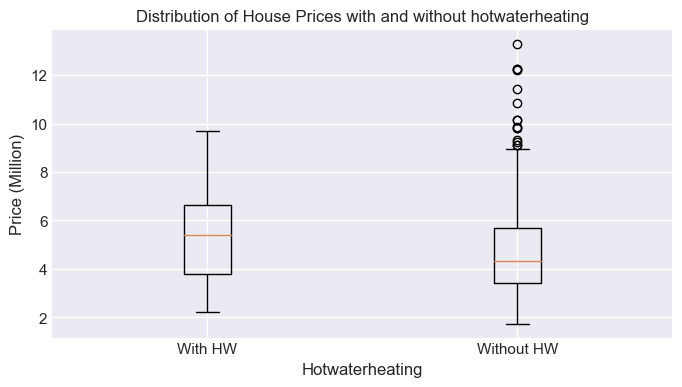

In [41]:
prices_with_ac = df[df['hotwaterheating'] == 'yes']['price'] / 1e6  
prices_without_ac = df[df['hotwaterheating'] == 'no']['price'] / 1e6  

plt.figure(figsize=(8, 4))
plt.boxplot([prices_with_ac, prices_without_ac], labels=['With HW', 'Without HW'])
plt.title('Distribution of House Prices with and without hotwaterheating')
plt.ylabel('Price (Million)')
plt.xlabel('Hotwaterheating')
plt.grid(True)
plt.show()

<Axes: xlabel='price', ylabel='area'>

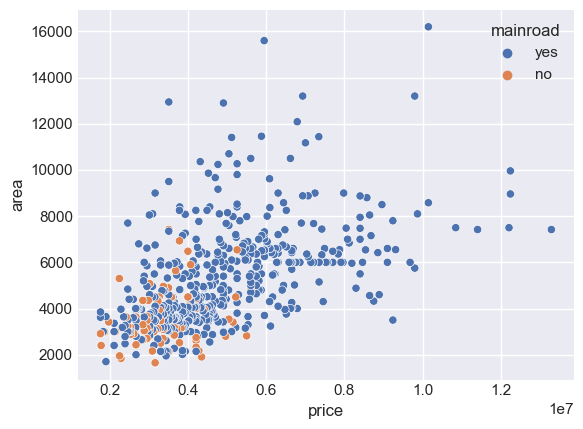

In [42]:
sns.scatterplot(x='price',y='area',hue = 'mainroad',data=df)

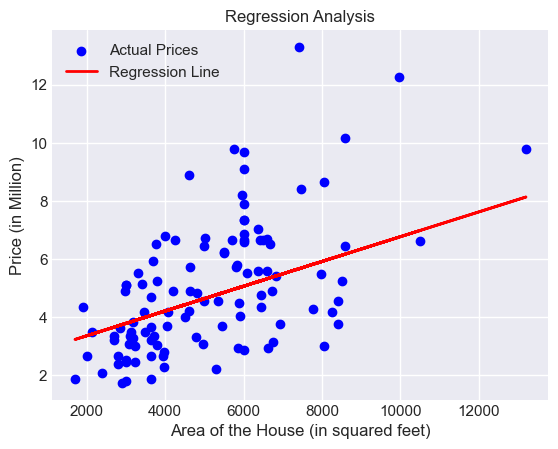

In [43]:
df['price'] /= 1000000

X = df[['area']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='blue', label='Actual Prices')

plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

plt.title('Regression Analysis')
plt.xlabel('Area of the House (in squared feet)')
plt.ylabel('Price (in Million)')
plt.legend()
plt.show()

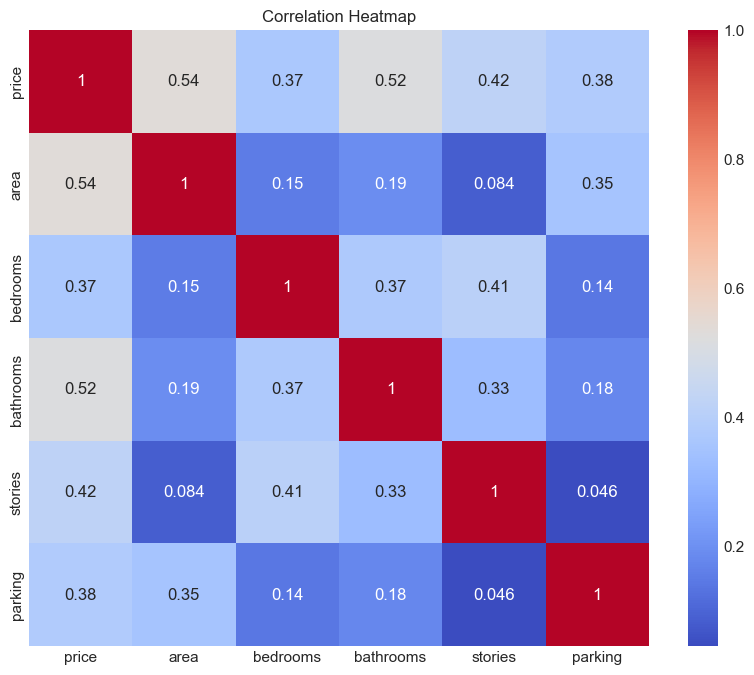

In [44]:
num_col = df[['price','area','bedrooms','bathrooms','stories','parking']]
plt.figure(figsize=(10, 8))
sns.heatmap(num_col.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

D:\SOFTWARE\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


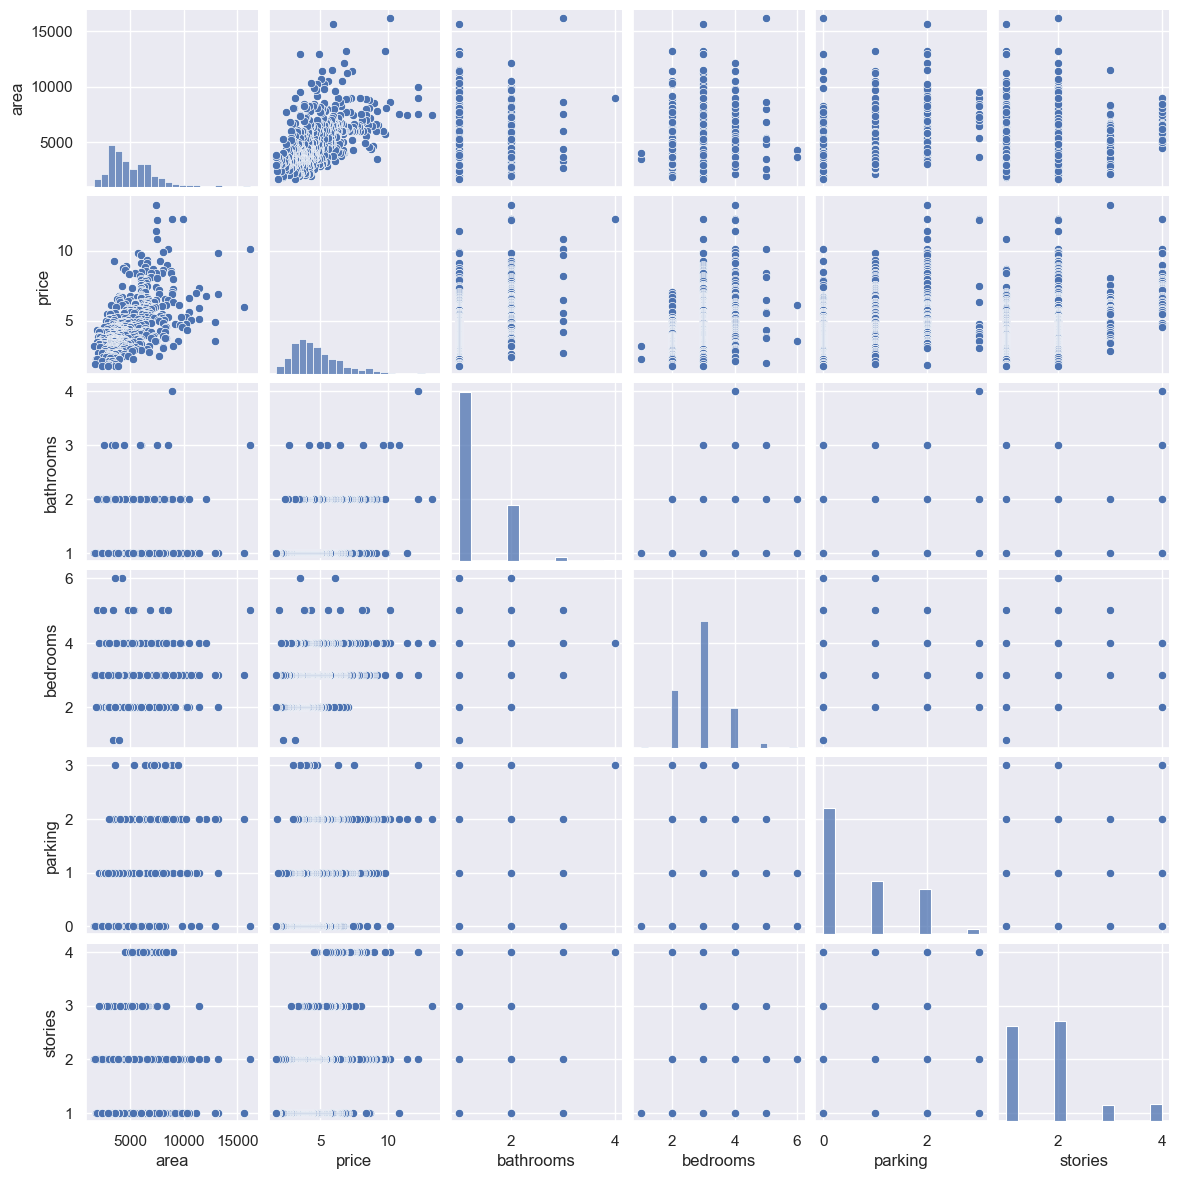

In [45]:
sns.set()
cols = ['area', 'price', 'bathrooms', 'bedrooms', 'parking', 'stories']
sns.pairplot(df[cols], height = 2)
plt.xticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show();

In [46]:
name_col = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
for i in range(len(name_col)) :
    df[name_col[i]]=  df[name_col[i]].map({'yes':1,'no':0}).astype(int)

In [47]:
dummy_furnishingstatus = pd.get_dummies(df.furnishingstatus, prefix="furnishingstatus")
dummy_furnishingstatus = dummy_furnishingstatus.astype(int)

df_cleaned = pd.concat([df, dummy_furnishingstatus ], axis=1)
df_cleaned = df_cleaned.drop(['furnishingstatus'], axis = 1)

In [48]:
df_cleaned.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13.300,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12.250,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12.250,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12.215,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11.410,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
5,10.850,7500,3,3,1,1,0,1,0,1,2,1,0,1,0
6,10.150,8580,4,3,4,1,0,0,0,1,2,1,0,1,0
7,10.150,16200,5,3,2,1,0,0,0,0,0,0,0,0,1
8,9.870,8100,4,1,2,1,1,1,0,1,2,1,1,0,0
9,9.800,5750,3,2,4,1,1,0,0,1,1,1,0,0,1


In [49]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            545 non-null    float64
 1   area                             545 non-null    int64  
 2   bedrooms                         545 non-null    int64  
 3   bathrooms                        545 non-null    int64  
 4   stories                          545 non-null    int64  
 5   mainroad                         545 non-null    int32  
 6   guestroom                        545 non-null    int32  
 7   basement                         545 non-null    int32  
 8   hotwaterheating                  545 non-null    int32  
 9   airconditioning                  545 non-null    int32  
 10  parking                          545 non-null    int64  
 11  prefarea                         545 non-null    int32  
 12  furnishingstatus_furni

In [50]:
df_train = df_cleaned.copy()

In [51]:
X = df_train.drop(columns=['price'])
y = df_train.price.values

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [53]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [58]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)
print("linear Regression fitting")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score:", r2_lr)

linear Regression fitting
Mean Squared Error (MSE): 1.7543186873306644
Mean Absolute Error (MAE): 0.9700434039201641
R-squared Score: 0.6529242642153182


In [59]:
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_dec = r2_score(y_test, y_pred)
print("Decision Tree fitting")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score:", r2_dec)

Decision Tree fitting
Mean Squared Error (MSE): 2.9325979655963312
Mean Absolute Error (MAE): 1.2131513761467887
R-squared Score: 0.41981260074318516


In [60]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)
print("Random Forest fitting")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score:", r2_rf)

Random Forest fitting
Mean Squared Error (MSE): 1.9391997464234394
Mean Absolute Error (MAE): 1.0116718532110092
R-squared Score: 0.6163472556702445


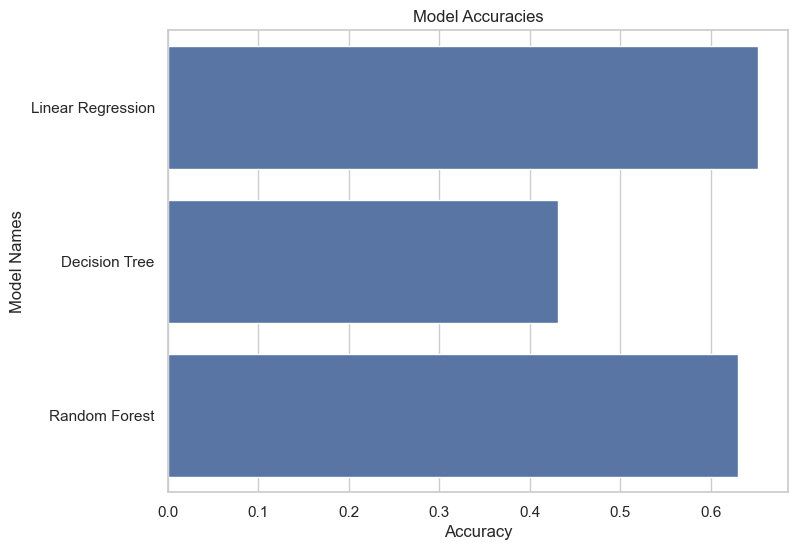

In [57]:
r2_values = [r2_lr, r2_dec, r2_rf]
Names = ['Linear Regression', 'Decision Tree', 'Random Forest']
data = pd.DataFrame({"Names": Names, "Accuracies": r2_values})

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.barplot(x="Accuracies", y="Names", data=data, color="b")

plt.xlabel("Accuracy")
plt.ylabel("Model Names")
plt.title("Model Accuracies")

plt.show()